In [1]:
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from config import consumer_key, consumer_secret, access_token, access_token_secret

In [2]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Setup Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Target Account
target_user = "@SouthwestAir"

# Counter
counter = 1

# Variables for holding sentiments
sentiments = []

# Variable for max_id
oldest_tweet = None

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Loop through all tweets 
    for tweet in api.user_timeline(target_user, max_id=oldest_tweet):
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        
        # Get Tweet ID, subtract 1, and assign to oldest_tweet
        oldest_tweet = tweet['id'] - 1
        
        # Add date, "tweets ago" (use counter), and sentiments for each tweet into a list
        sentiments.append({
            "Date": tweet["created_at"], 
            "Compound": compound,
            "Positive": pos,
            "Negative": neu,
            "Neutral": neg,
            "Tweets Ago": counter
        })
        
        # Add to counter 
        counter += 1

In [4]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,0.7003,Tue Nov 27 00:12:20 +0000 2018,0.755,0.00,0.245,1
1,0.7345,Tue Nov 27 00:11:37 +0000 2018,0.708,0.00,0.292,2
2,0.5093,Tue Nov 27 00:11:01 +0000 2018,0.810,0.00,0.190,3
3,0.6369,Tue Nov 27 00:09:57 +0000 2018,0.802,0.00,0.198,4
4,0.2500,Tue Nov 27 00:08:38 +0000 2018,0.833,0.06,0.106,5


Text(0.5,0,'Tweets Ago')

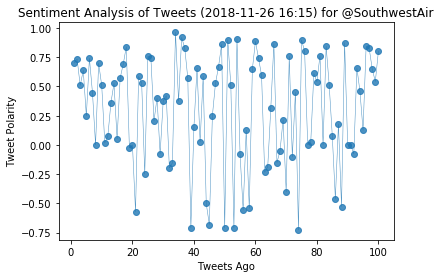

In [5]:
# Create plot for tweets ago vs compound sentiment score
plt.plot(
    sentiments_pd["Tweets Ago"],
    sentiments_pd["Compound"], 
    marker="o", 
    linewidth=0.5,
    alpha=0.8
)

# Incorporate the other graph properties
now = datetime.now().strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for {target_user}")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")